# Центральная предельная теорема своими руками.

## Задача:

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

In [182]:
# импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import math
from scipy.stats import expon

## Выбор любимого непрерывного распределения:

Я выбрал распределение Гомпертца. Оно мне кажется самым любопытным и интересным. Плюс мы его не рассматривали в обучении. Поэтому будет полезнее изучить его самостоятельно.
Подробнее о [Экспоненциальном распределении](https://ru.wikipedia.org/wiki/Экспоненциальное_распределение) и его использовании [scipy.stats.expon](https://docs.scipy.org/doc/scipy-1.2.1/reference/generated/scipy.stats.expon.html).

### Сгенерируйте из него выборку объёма 1000:

In [183]:
r = expon.rvs(size=1000) # Генерируем рандомные числа

### Постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины:

In [184]:
x = np.linspace(expon.ppf(0.01),expon.ppf(0.99), 1000)

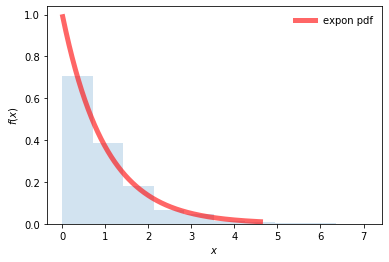

In [185]:
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2) # Из рандомных данных строим гистограмму
plt.plot(x, expon.pdf(x),'r-', lw=5, alpha=0.6, label='expon pdf') # строим график теоретической функции распределения
plt.xlabel('$x$') # подписываем оси
plt.ylabel('$f(x)$')
plt.legend(loc='best', frameon=False) # выводим подпись графика
plt.show() # смотрим что получилось

#### Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

n = 5


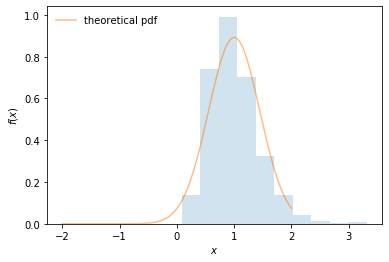

n = 20


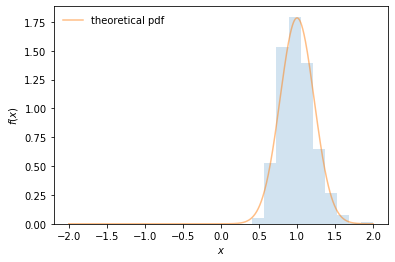

n = 100


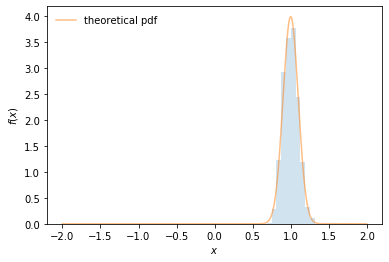

In [186]:
D = [5, 20, 100]
for n in D:
    print('n =',n)
    r = [np.mean(expon.rvs(size=n)) for i in range(1000)] # Гистограмма выборки
    plt.hist(r, density=True, histtype='stepfilled', alpha=0.2) 
    
    loc = 1
    std = np.sqrt(loc**2 / n) # стандартное отклонение
    
    x = np.linspace(2, -2, 1000) # Массив значений аргумента
    std = sts.norm.pdf(x ,loc , std)
    plt.plot(x, std, label='theoretical pdf', alpha=0.5) # Построение графика
    plt.xlabel('$x$') # подписываем оси
    plt.ylabel('$f(x)$')
    plt.legend(loc='best', frameon=False) # выводим подпись графика
    plt.show() # смотрим что получилось

#### Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

По мере увеличения n точность аппроксимации распределения выборочных средних нормальным увеличивается. Стремится к нормальному распределению.Что подтверждает действие центральной предельной теоремы.